In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_fact = pd.read_csv('C:/Users/USER/Documents/UoD/Processing Big Data/Data/FactInternetSales.csv')
df_customer = pd.read_csv('C:/Users/USER/Documents/UoD/Processing Big Data/Data/DimCustomer.csv')
df_procat = pd.read_csv('C:/Users/USER/Documents/UoD/Processing Big Data/Data/AWProduct.csv')
df_salesTerr = pd.read_csv('C:/Users/USER/Documents/UoD/Processing Big Data/Data/DimSalesTerritory.csv')

In [54]:
fact_terr = pd.merge(df_fact, df_salesTerr, on='SalesTerritoryKey', how='left')
rejoin = pd.merge(fact_terr, df_customer, on = 'CustomerKey', how = 'left')
df_final = pd.merge(rejoin, df_procat, on = 'ProductKey', how = 'left')

In [55]:
pd.set_option('display.max_columns', 84)
df_final.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,ProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,Size,SizeRange,Weight,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,ProductDescription,StartDate,EndDate,Status
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,6,Canada,Canada,North America,0xFFD8FFE000104A46494600010101006000600000FFDB...,53,AW00021768,NaN,Cole,A,Watson,0,1952-02-19,S,NaN,M,cole1@adventure-works.com,70000.0,5,0,Bachelors,Licenciatura,Bac + 4,Management,Gestión,Direction,1,3,601 Asilomar Dr.,NaN,110-555-0129,2010-12-29,10+ Miles,BK-R93R-62,2.0,LB,CM,"Road-150 Red, 62",2171.2942,1,Red,100,75,3578.2700,62,60-62 CM,15.00,4,R,2146.9620,H,U,Road-150,This bike is ridden by race winners. Developed...,2011-07-01 00:00:00.000,2007-12-28 00:00:00.000,NaN
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,7,France,France,Europe,0xFFD8FFE000104A46494600010101004800480000FFDB...,222,AW00028389,NaN,Rachael,M,Martinez,0,1970-06-17,S,NaN,F,rachael16@adventure-works.com,20000.0,3,3,High School,Educación secundaria,Bac + 2,Manual,Obrero,Ouvrier,0,0,"14, avenue du Port",NaN,1 (11) 500 555-0190,2010-12-29,0-1 Miles,BK-M82S-44,1.0,LB,CM,"Mountain-100 Silver, 44",1912.1544,1,Silver,100,75,3399.9900,44,42-46 CM,21.13,4,M,2039.9940,H,U,Mountain-100,Top-of-the-line competition mountain bike. Per...,2011-07-01 00:00:00.000,2007-12-28 00:00:00.000,NaN
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,1,Northwest,United States,North America,0xFFD8FFE000104A46494600010101004800480000FFDB...,543,AW00025863,NaN,Sydney,S,Wright,0,1952-06-01,S,NaN,F,sydney61@adventure-works.com,40000.0,5,0,High School,Educación secundaria,Bac + 2,Professional,Profesional,Cadre,1,3,4193 E. 28th Street,NaN,285-555-0113,2010-12-29,10+ Miles,BK-M82S-44,1.0,LB,CM,"Mountain-100 Silver, 44",1912.1544,1,Silver,100,75,3399.9900,44,42-46 CM,21.13,4,M,2039.9940,H,U,Mountain-100,Top-of-the-line competition mountain bike. Per...,2011-07-01 00:00:00.000,2007-12-28 00:00:00.000,NaN
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,1,1,699.0982,699.0982,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,4,Southwest,United States,North America,0xFFD8FFE000104A46494600010101004800480000FFDB...,300,AW00014501,NaN,Ruben,NaN,Prasad,0,1943-11-10,M,NaN,M,ruben10@adventure-works.com,80000.0,4,0,Graduate Degree,Estudios de postgrado,Bac + 3,Management,Gestión,Direction,1,2,249 Alexander Pl.,NaN,175-555-0159,2010-12-29,1-2 Miles,BK-R50B-62,2.0,LB,CM,"Road-650 Black, 62",413.1463,1,Black,100,75,699.0982,62,6

In [56]:
df_class = df_final

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 0 to 60397
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ProductKey                  60398 non-null  int64  
 1   OrderDateKey                60398 non-null  int64  
 2   DueDateKey                  60398 non-null  int64  
 3   ShipDateKey                 60398 non-null  int64  
 4   CustomerKey                 60398 non-null  int64  
 5   PromotionKey                60398 non-null  int64  
 6   CurrencyKey                 60398 non-null  int64  
 7   SalesTerritoryKey           60398 non-null  int64  
 8   SalesOrderNumber            60398 non-null  object 
 9   SalesOrderLineNumber        60398 non-null  int64  
 10  RevisionNumber              60398 non-null  int64  
 11  OrderQuantity               60398 non-null  int64  
 12  UnitPrice                   60398 non-null  float64
 13  ExtendedAmount              603

In [128]:
# Picking out the needed parameters
df_final = df_final[['Freight', 'SalesTerritoryGroup', 'TaxAmt', 'ProductStandardCost', 'UnitPrice', 'Gender', 'SafetyStockLevel', 'ReorderPoint']]

DATA MANIPULATION

In [112]:
# replacing unusable data with usables
#df_final['Color'].replace('NA', 'Neutral', inplace=True)

In [113]:
#assigning the dummy variables
#gend = pd.get_dummies(df_final['Gender'], drop_first=True)
#gend.rename(columns = {'M' :'Sex'}, inplace = True)

In [129]:
#assigning the dummy variables
gend = pd.get_dummies(df_final['Gender'], drop_first=True)
stg = pd.get_dummies(df_final['SalesTerritoryGroup'], drop_first=True)

In [130]:
# concatenating the new variables to the main
df_final = pd.concat([df_final, stg, gend], axis = 1)
df_final.drop(columns=['SalesTerritoryGroup', 'Gender'], inplace = True)

In [132]:
# Renaming the gender variable
df_final.rename(columns = {'M' :'Gender'}, inplace = True)
df_final.head()

,Freight,TaxAmt,ProductStandardCost,UnitPrice,SafetyStockLevel,ReorderPoint,North America,Pacific,Gender
0,89.4568,286.2616,2171.2942,3578.2700,100,75,1,0,1
1,84.9998,271.9992,1912.1544,3399.9900,100,75,0,0,0
2,84.9998,271.9992,1912.1544,3399.9900,100,75,1,0,0
3,17.4775,55.9279,413.1463,699.0982,100,75,1,0,1
4,84.9998,271.9992,1912.1544,3399.9900,100,75,0,1,0


In [274]:
df_final.corr()

,Freight,TaxAmt,ProductStandardCost,UnitPrice,SafetyStockLevel,ReorderPoint,North America,Pacific,Gender
Freight,1.000000,1.000000,0.997845,1.000000,-0.113986,-0.113986,-0.096781,0.110640,-0.007944
TaxAmt,1.000000,1.000000,0.997845,1.000000,-0.113986,-0.113986,-0.096781,0.110640,-0.007944
ProductStandardCost,0.997845,0.997845,1.000000,0.997845,-0.114421,-0.114421,-0.098915,0.112514,-0.007693
UnitPrice,1.000000,1.000000,0.997845,1.000000,-0.113986,-0.113986,-0.096781,0.110640,-0.007944
SafetyStockLevel,-0.113986,-0.113986,-0.114421,-0.113986,1.000000,1.000000,0.004585,-0.027250,0.003523
ReorderPoint,-0.113986,-0.113986,-0.114421,-0.113986,1.000000,1.000000,0.004585,-0.027250,0.003523
North America,-0.096781,-0.096781,-0.098915,-0.096781,0.004585,0.004585,1.000000,-0.511205,0.004290
Pacific,0.110640,0.110640,0.112514,0.110640,-0.027250,-0.027250,-0.511205,1.000000,-0.004207
Gender,-0.007944,-0.007944,-0.007693,-0.007944,0.003523,0.003523,0.004290,-0.004207,1.000000


In [275]:
pd.set_option('display.max_columns', 39)

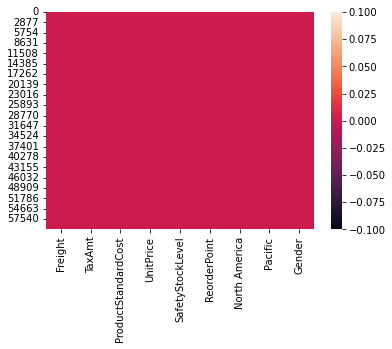

In [133]:
#we  use seaborn to create a heatmap to visualise missing values
#every light point stands for a missing value ie, isnull
sns.heatmap(df_final.isnull());

THE PREPROCESSING

In [134]:
# creating the independent and dependent variables
X = df_final.drop(['UnitPrice'], axis = 1)
y = df_final['UnitPrice']

In [135]:
from sklearn.model_selection import train_test_split

In [255]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [136]:
# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# THE MULTIVARIATE LINEAR REGRESSION

In [137]:
# creating and train the model
from sklearn.linear_model import LinearRegression

In [138]:
#creating a linear regression object
lm = LinearRegression()

In [139]:
#fitting the model on the training data
lm.fit(X_train, y_train)

LinearRegression()

In [140]:
#evaluating our model by cheching out its coefficient and see how we can interprete them
lm.intercept_

-3.7272590532211325e-05

In [141]:
# the corresponding coefficients
lm.coef_

array([ 7.73788577e-01,  1.22581859e+01,  6.64694284e-07,  7.28404595e+05,
       -9.71206126e+05,  3.63485643e-06, -5.25225464e-06, -1.14952227e-06])

In [261]:
# viesing the coefficients with their respective columns
clm = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficent'])
clm.transpose()

,Freight,TaxAmt,ProductStandardCost,SafetyStockLevel,ReorderPoint,North America,Pacific,Gender
coefficent,0.773789,12.258186,6.646943e-07,728404.594571,-971206.126094,0.000004,-0.000005,-0.000001


In [143]:
#grabbing predictions from the test sets
prediction = lm.predict(X_test)

In [144]:
# the predicted values
prediction

array([  29.99000213,   34.98999579,   34.98999943, ...,    9.99000348,
       1000.43742547,    8.98999475])

In [260]:
# cross validataion 
prediction = cross_val_score(lm, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % prediction.mean())
print("Standard Deviation cross-validation score: %.2f" % prediction.std())

Mean cross-validation score: 1.00
Standard Deviation cross-validation score: 0.00


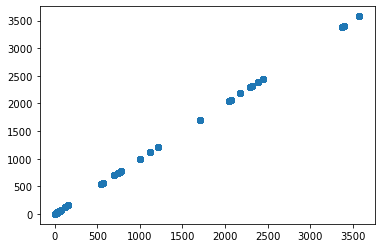

In [145]:
#checking the efficiency of the model with scater plot
plt.scatter(y_test, prediction);

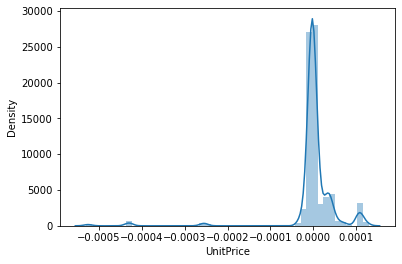

In [148]:
#creating a hidtogram/distribution of the residual, diff bettween the actual value and the predicted value
sns.distplot(y_test-prediction);

In [149]:
from sklearn import metrics

In [150]:
#talks about how much variance of the model is explained, the higher the %, the better the model
metrics.explained_variance_score(y_test, prediction)

0.9999999999999951

# POLYNOMIAL REGRESSION

In [151]:
#Polinomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

In [244]:
#creating a poly_reg object with a default degree/order 2
poly_reg = PolynomialFeatures(degree = 5, include_bias=False)

In [245]:
poly_reg.fit(X_train)

PolynomialFeatures(degree=5, include_bias=False)

In [246]:
poly_X_train = poly_reg.fit_transform(X_train)

In [247]:
poly_X_test = poly_reg.fit_transform(X_test)
poly_X_test = poly_reg.fit_transform(X_test)

In [248]:
# modelling the polynomial regression using linear regression
regressor2 = LinearRegression()

In [249]:
regressor2.fit(poly_X_train, y_train)

LinearRegression()

In [250]:
y_predp = regressor2.predict(poly_X_test)

In [251]:
regressor2.intercept_

10.508588383775816

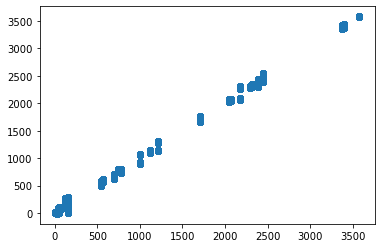

In [252]:
#checking the efficiency of the model with scater plot
plt.scatter(y_test, y_predp);

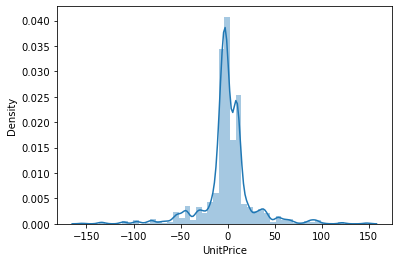

In [253]:
#creating a hidtogram/distribution of the residual, diff bettween the actual value and the predicted value
sns.distplot(y_test - y_predp);

In [254]:
#talks about how much variance of the model is explained, the higher the %, the better the model
metrics.explained_variance_score(y_test, y_predp)

0.9991800797520277

# RANDOM FOREST

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [217]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [218]:
pred_rf = regressor.predict(X_test)

In [259]:
# cross validataion 
pred_rf = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv=10)
print("Mean cross-validation score: %.2f" % pred_rf.mean())
print("Standard Deviation cross-validation score: %.2f" % pred_rf.std())

Mean cross-validation score: 1.00
Standard Deviation cross-validation score: 0.00


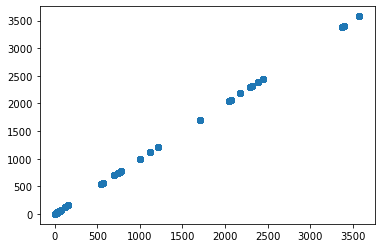

In [219]:
#checking the efficiency of the model with scater plot
plt.scatter(y_test, pred_rf);

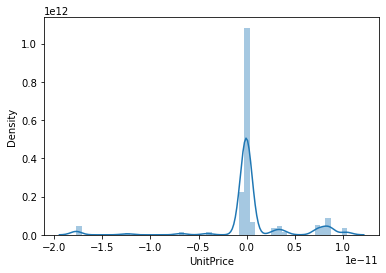

In [220]:
#creating a hidtogram/distribution of the residual, diff bettween the actual value and the predicted value
sns.distplot(y_test - pred_rf);

In [221]:
#talks about how much variance of the model is explained, the higher the %, the better the model
metrics.explained_variance_score(y_test, y_predp)

0.997352102704541

# XG BOOST

In [225]:
! pip install xgboost

In [226]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [227]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [229]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)